### Assignment: Unsupervised and Reinforcement Learning

#### Exercise 1: Destination reviews

Dataset with destination reviews published by 249 reviewers of holidayiq.com.

1. Use the k-means angorithm to cluster the reviews in 5 groups using all attributes except the ID. Run the algorithm 60 times with different centroid seeds and obtain the centroids. 
2. Identify the number of clusters using the silhouette analysis.

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [10]:
import pandas as pd 

# Reading data file into pandas dataframe
data = pd.read_csv("buddymove_holidayiq.csv") 
data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [11]:
# Removing ID to prepare for clustering k-means algorithm
clust_data = data.iloc[:,1:]
clust_data.head()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68
2,2,50,97,87,50,75
3,2,68,77,95,76,61
4,2,98,54,59,95,86


In [12]:
# Using KMeans from scikit learn
from sklearn.cluster import KMeans

# From scikit learn documentation 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#    n_init : int, default: 10
#    Number of time the k-means algorithm will be run with different centroid seeds. 
#    The final results will be the best output of n_init consecutive runs in terms of inertia.

# As scikit learn documentation is stating, the k-means algorithm will be run using different centroid seeds
# The default is 10 times, but as the assignment indicates, we will be running the algorithm 60 times.

# 
km_alg = KMeans(n_clusters=5, n_init=60)
km_alg.fit(clust_data)
clust_result = km_alg.predict(clust_data)

clust_centroids = km_alg.cluster_centers_

print("After running the algorithm 60 times, the best result yields the following centroids:")
print(clust_centroids)

After running the algorithm 60 times, the best result yields the following centroids:
[[  5.875      118.95833333  66.25        81.54166667 124.125
  100.08333333]
 [ 17.6744186   96.86046512 195.72093023 132.58139535  90.30232558
  147.44186047]
 [ 17.24561404 128.14035088 142.         144.36842105 135.56140351
  139.49122807]
 [  6.12631579  83.46315789 108.8        102.16842105  80.90526316
   94.65263158]
 [ 17.3        169.4         85.63333333 112.83333333 192.4
  143.16666667]]


In [14]:
# For the second question
# I will test different numbers of centroids

n_centroids_list = [2,3,4,5,6,7,8]

for n_centroids in n_centroids_list:
    
    km_alg2 = KMeans(n_clusters=n_centroids, n_init=60)
    km_alg2.fit(clust_data)
    clust_result2 = km_alg2.predict(clust_data)

    silhouette_avg = silhouette_score(clust_data, clust_result2)
    
    print("Number of centroids: {}".format(n_centroids))
    print("The average silhouette_score is: {}".format(silhouette_avg))

Number of centroids: 2
The average silhouette_score is: 0.30794264630855106
Number of centroids: 3
The average silhouette_score is: 0.3492187864800945
Number of centroids: 4
The average silhouette_score is: 0.3422572691507888
Number of centroids: 5
The average silhouette_score is: 0.30212820941547414
Number of centroids: 6
The average silhouette_score is: 0.2978550526393102
Number of centroids: 7
The average silhouette_score is: 0.28647303259412793
Number of centroids: 8
The average silhouette_score is: 0.3032938831981478


For n_clusters = 2 The average silhouette_score is : 0.3079416087641895
For n_clusters = 3 The average silhouette_score is : 0.3492187864800945
For n_clusters = 4 The average silhouette_score is : 0.3422572691507888
For n_clusters = 5 The average silhouette_score is : 0.28964374748052757
For n_clusters = 6 The average silhouette_score is : 0.3033195913592543
For n_clusters = 7 The average silhouette_score is : 0.2807053525003885
For n_clusters = 8 The average silhouette_score is : 0.3054187605036031


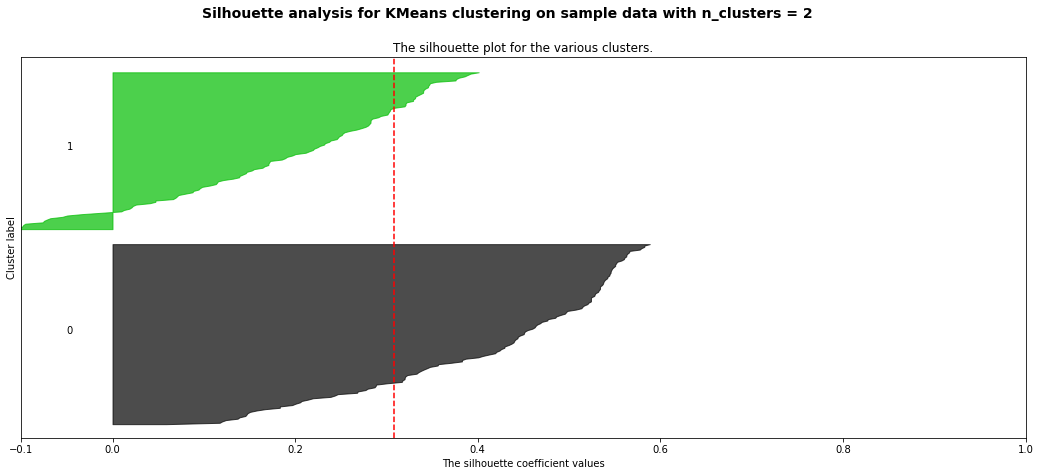

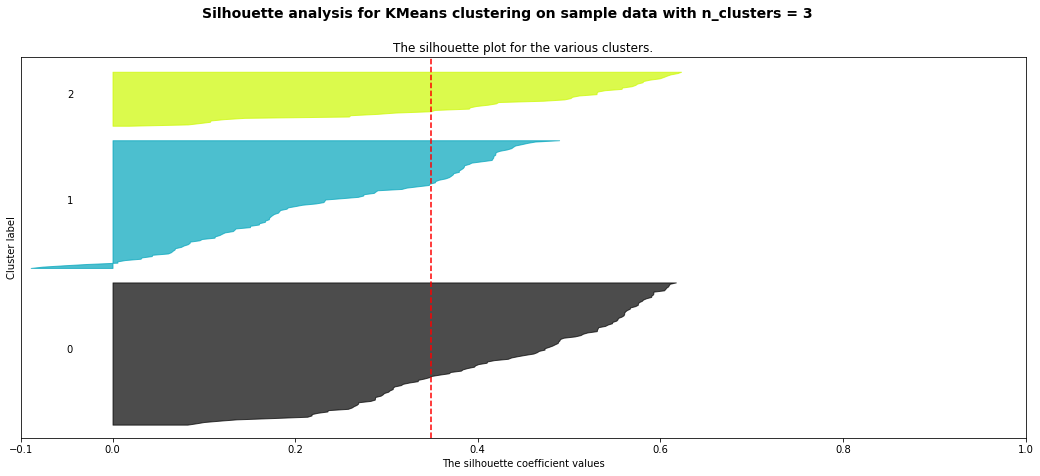

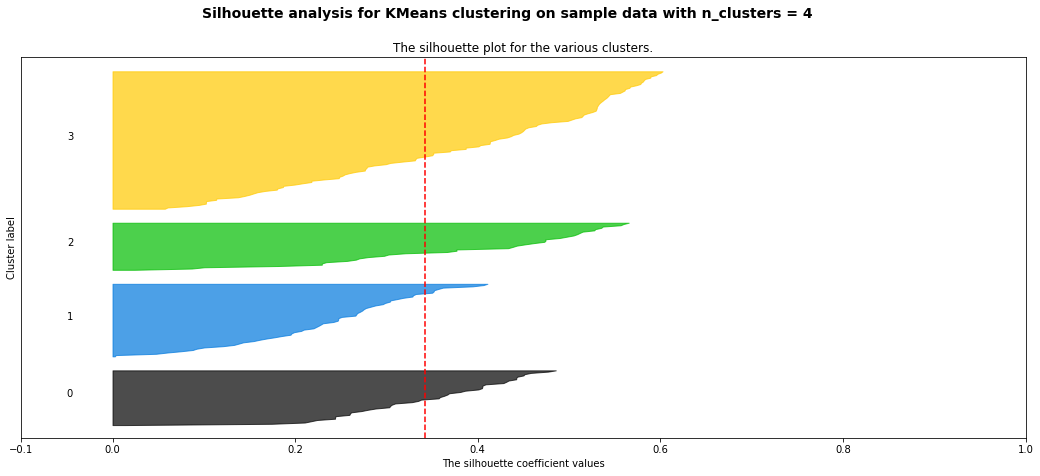

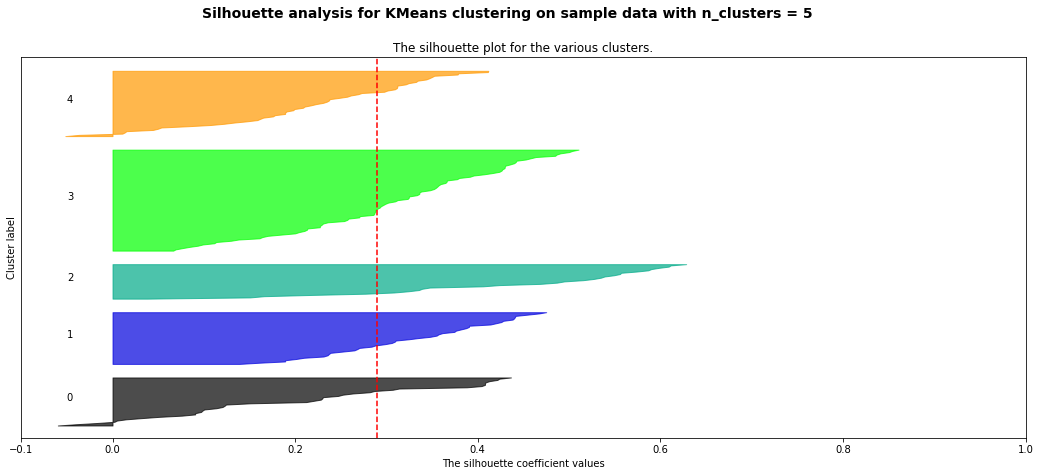

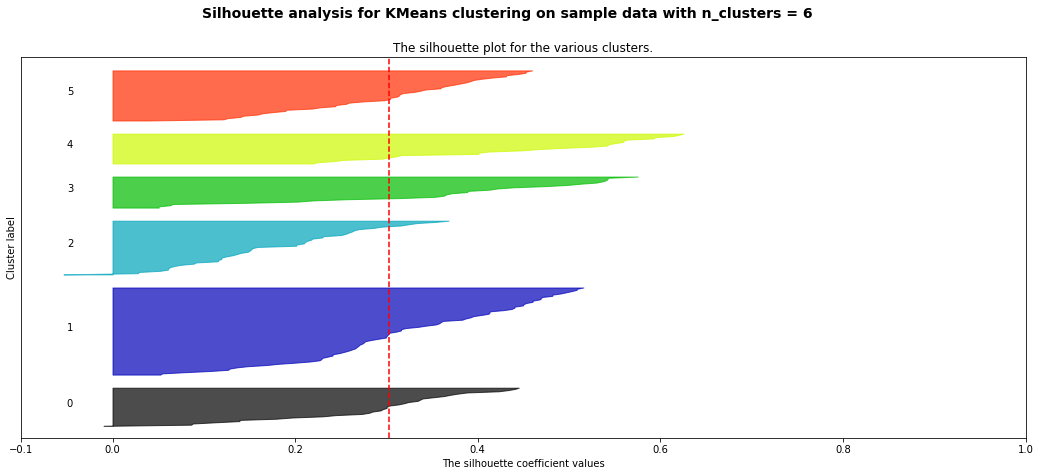

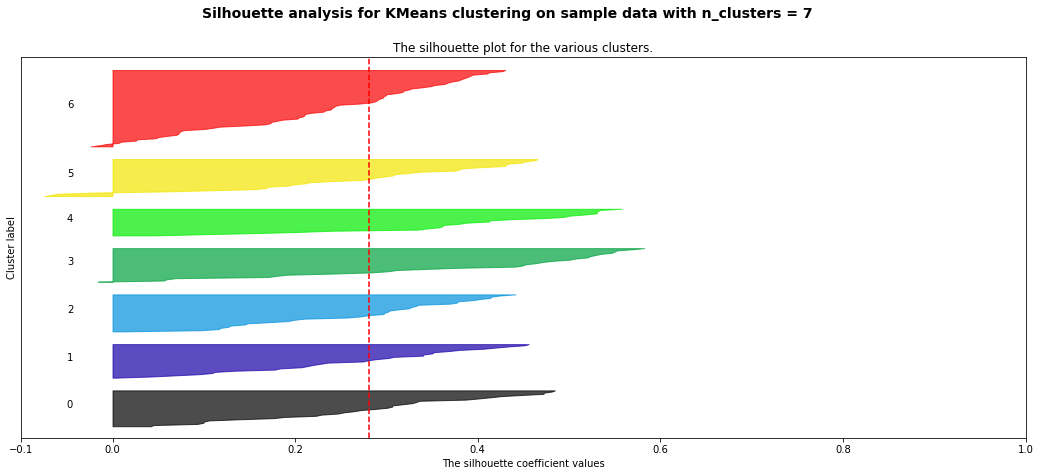

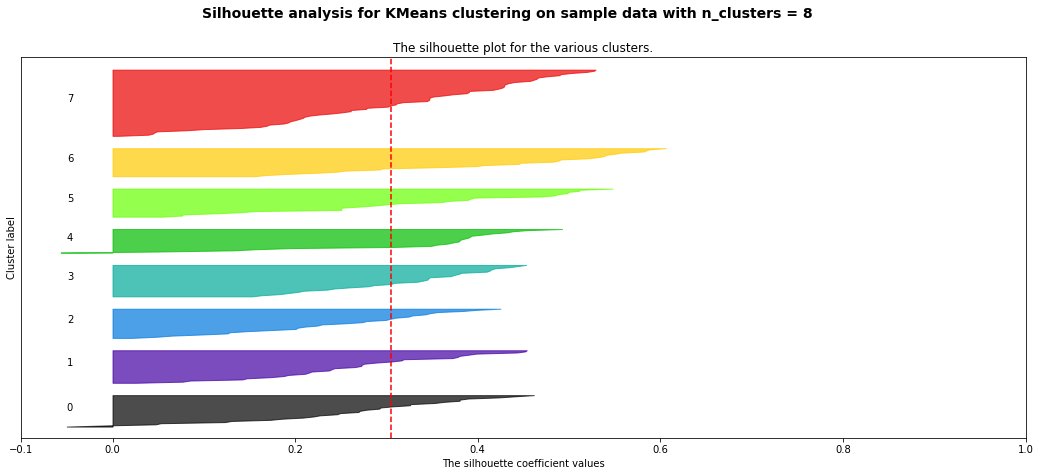

In [18]:
X = clust_data
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Exercise 2: Dynamic programming

In OpenAI GYM load the environment "FrozenLake8x8-v0". Using dynamic programming obtain the value function and the optimal policy in this game. 

1. Obtain the value function 
2. Obtain the optimal policy

In [21]:
%pylab
%matplotlib inline

import gym

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [106]:
# To make the the environment
# 8x8 map is selected
# The default value is a slippery environment
# I am including it in the definition to make this clear
env = gym.make("FrozenLake-v0", map_name='8x8', is_slippery='True')

env.reset()  # Initial state of the environment (Starting point)
env.render() # Show the map with current status



SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


#### Legend to read map render

- S: starting point
- G: goal
- F: solid ice, where the agent can stand
- H: hole where the agent cannot fall


#### Moves 
Moves are represented in the environment as integers.

* 0: left
* 1: down
* 2: right
* 3: up

The episode ends when the agent reach the goal or fall in a hole. The agent receive a reward of 1 if it reach the goal, and zero otherwise.

In [62]:
env.reset()

# Done will be True once the agent dies (H) or reaches the goal (G)
done = False  

# Executing random movements just to see them on the map
while not done:
    observation, reward, done, info = env.step(1)
    
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


The agent's movements are not deterministic.
The final result of a state transition (the movement) does not depend entirely on the action taken.

#### Value Iteration

In [72]:
def value_iteration(env, gamma=1, max_iter=5000, convergence=1e-8):
    V = np.zeros(env.observation_space.n)

    for iterations in range(max_iter):
        old_V = np.copy(V) 

        for state in range(env.observation_space.n):
            Q = []
            max_reward = 0
            for action in range(env.action_space.n):
                reward = 0
                for next_sr in env.P[state][action]: 
                    trans_prob, next_state, reward_prob, _ = next_sr 
                    reward += (trans_prob * (reward_prob + gamma * old_V[next_state]))
                
                max_reward = max(reward, max_reward)
                #if reward > max_reward:
                #    max_reward = reward

            V[state] = max_reward 

        if (np.sum(np.fabs(old_V - V)) <= convergence):
            print ('Value function converged in %d iterations.' %(iterations+1))
            break
            
            
    return V


In [77]:
import time 

START_TIME = time.time()
V = value_iteration(env)
END_TIME = time.time()

PROCESSING_TIME = END_TIME-START_TIME

print("Processing time for value function iteration was: {:f} s".format(PROCESSING_TIME))

Value function converged in 1285 iterations.
Processing time for value function iteration was: 1.302078 s


In [74]:
def extract_policy(env, V, gamma=1):
    policy = np.zeros(env.observation_space.n)

    for state in range(env.observation_space.n):
        Q = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q[action] += (trans_prob * (reward_prob + gamma * V[next_state]))
        policy[state] = np.argmax(Q)

    print(policy)
    
extract_policy(env, V)

[3. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 2. 0. 0. 0. 0. 2. 3. 3. 2.
 0. 0. 0. 1. 0. 0. 2. 2. 0. 3. 0. 0. 2. 1. 3. 2. 0. 0. 0. 1. 3. 0. 0. 2.
 0. 0. 1. 0. 0. 0. 0. 2. 0. 1. 0. 0. 1. 2. 1. 0.]


#### Policy iteration

In [83]:
def compute_value_function(policy, gamma=1.0, convergence=1e-8):
    V = np.zeros(env.nS)
    old_V = np.ones(env.nS)
    
    while np.sum((np.fabs(old_V - V))) > convergence:
        old_V = np.copy(V)
        V = np.zeros(env.nS)
        for state in range(env.nS):
            action = policy[state]
            for trans_prob, next_state, reward_prob, _ in env.P[state][action]:
                V[state] += trans_prob * (reward_prob + gamma * old_V[next_state])
            
    return V


def extract_policy(V, gamma = 1.0):
    policy = np.zeros(env.observation_space.n)
    
    for state in range(env.observation_space.n):
        Q = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q[action] += (trans_prob * (reward_prob + gamma * V[next_state]))
        policy[state] = np.argmax(Q)
    
    return policy

def policy_iteration(env,gamma=1.0, max_iter=1000):
    policy = np.zeros(env.observation_space.n) 

    for iterations in range(max_iter):
        value_function = compute_value_function(policy, gamma)
        new_policy = extract_policy(value_function, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged in %d iterations.' %(iterations+1))
            break
        policy = new_policy
    return new_policy

#print (policy_iteration(env))

In [84]:
START_TIME = time.time()
optimal_policy = policy_iteration(env)
END_TIME = time.time()

PROCESSING_TIME = END_TIME-START_TIME

print("Processing time for policy iteration was: {:f} s".format(PROCESSING_TIME))

Policy-Iteration converged in 13 iterations.


In [85]:
value_f_optimal_policy = compute_value_function(optimal_policy)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


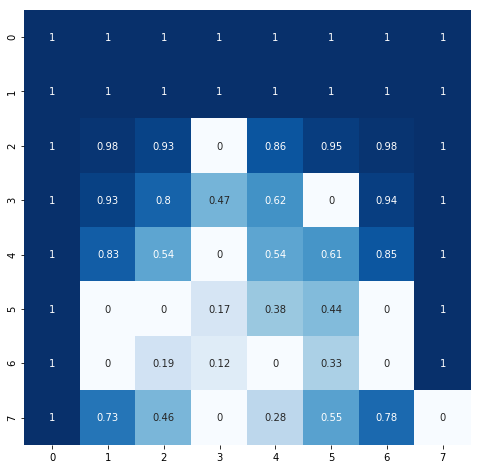

In [93]:
import seaborn as sns

plt.figure(figsize=(8, 8))

# palettes: YlGnBu, BuPu, BuPu
sns.heatmap(value_f_optimal_policy.reshape(8,8),  cmap="Blues", annot=True, cbar=False)

In [147]:
map_list = ['S','F','F','F','F','F','F','F',
            'F','F','F','F','F','F','F','F',
            'F','F','F','H','F','F','F','F',
            'F','F','F','F','F','H','F','F',
            'F','F','F','H','F','F','F','F',
            'F','H','H','F','F','F','H','F',
            'F','H','F','F','H','F','H','F',
            'F','F','F','H','F','F','F','G']

map_n_list = [None] * 8 * 8

for i in range(0, len(map_n_list)):
    if map_list[i] == 'S': map_n_list[i] = 2
    if map_list[i] == 'G': map_n_list[i] = 3
    if map_list[i] == 'F': map_n_list[i] = 1
    if map_list[i] == 'H': map_n_list[i] = 0

map_arr = np.array(map_n_list).reshape(8,8)

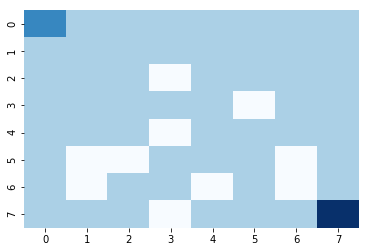

In [150]:
sns.heatmap(map_arr,  cmap="Blues", cbar=False)

In [129]:
np.array(map_n_list).reshape(8,8)

array([[2, 1, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, None, 0, None, None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, 3]], dtype=object)

In [126]:
sns.heatmap(np.array(map_n_list).reshape(8,8),  cmap="Blues", annot=True, cbar=False)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
sns.heatmap(value_f_optimal_policy.reshape(8,8),  cmap="Blues", annot=True, cbar=False)